In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('gyrodec_full_1545365126.csv')

In [4]:
df.head()

,timestamp,latitude,longitude,mag_x,mag_y,mag_z,gyro_x,gyro_y,gyro_z,axis,power,power_norm
0,1545365126,49.3123,128.7256,-0.007500,-0.033736,0.435326,0.016681,0.015061,-1.408055,0,4.094603,53.129849
1,1545365136,49.1101,129.6300,-0.005916,-0.034064,0.432130,0.016673,0.015061,-1.408055,0,4.145587,53.272950
2,1545365146,48.9003,130.5266,-0.004318,-0.034326,0.428849,0.016665,0.015061,-1.408055,0,4.187371,53.390227
3,1545365156,48.6828,131.4152,-0.002707,-0.034521,0.425483,0.016657,0.015061,-1.408055,0,4.219925,53.481600
4,1545365166,48.4579,132.2957,-0.001088,-0.034650,0.422038,0.016649,0.015061,-1.408055,0,4.243247,53.547059


In [5]:
X = df.iloc[:,3:8]
Y = df.iloc[:,10]

FEATURES = X.columns 
LABEL = Y.name

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=FEATURES)
Y = pd.DataFrame(scaler.fit_transform(Y.values.reshape(-1, 1)), columns=[LABEL])
#Y['power'] = Y['power'].apply(lambda x: x*1)

In [6]:
Y.head()

,power
0,0.531298
1,0.532729
2,0.533902
3,0.534816
4,0.535471


In [7]:
X.head()

,mag_x,mag_y,mag_z,gyro_x,gyro_y
0,0.370765,0.245137,0.960417,1.000000,1.0
1,0.377188,0.243215,0.957287,0.999117,1.0
2,0.383671,0.241681,0.954073,0.998232,1.0
3,0.390206,0.240537,0.950776,0.997347,1.0
4,0.396771,0.239782,0.947402,0.996461,1.0


/usr/local/lib/python3.6/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


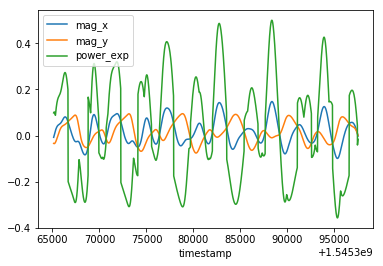

In [8]:
#X['mag_x'].plot()
# plt.plot('x', 'mag_x', data=X['mag_x'])
# plot.show()
df['power_exp'] = df['power']/df["power"].max() * 0.5
df.plot(x="timestamp", y=["mag_x", "mag_y", "power_exp"])

/usr/local/lib/python3.6/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


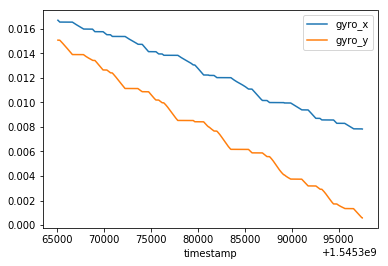

In [9]:
df.plot(x="timestamp", y=["gyro_x", "gyro_y"])

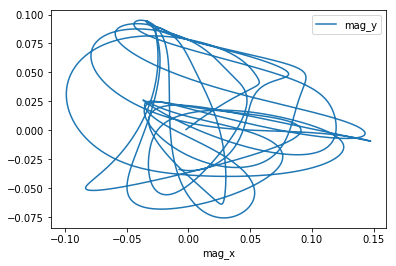

In [10]:
df.plot(x="mag_x", y="mag_y")

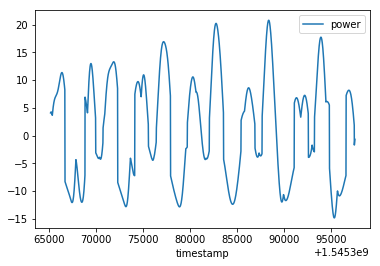

In [11]:
df.plot(x="timestamp", y="power")

In [12]:
for _alpha in [0.01, 0.05, .1, .2, .3, .4, .5, .6]:
    reg = linear_model.Ridge(alpha=_alpha)
    reg.fit(X,Y)
    print("Alpha: {} | Score: {}".format(_alpha, reg.score(X,Y)))

Alpha: 0.01 | Score: 0.8940256550456347
Alpha: 0.05 | Score: 0.8940232283378152
Alpha: 0.1 | Score: 0.8940161959496605
Alpha: 0.2 | Score: 0.8939914838045826
Alpha: 0.3 | Score: 0.8939562363983371
Alpha: 0.4 | Score: 0.8939137148020209
Alpha: 0.5 | Score: 0.8938662465923667
Alpha: 0.6 | Score: 0.8938155046958779


In [24]:
from sklearn.kernel_ridge import KernelRidge
best_score = 0
best_alpha = 0
best_gamma = 0
for _alpha in [0.001, 0.005, 0.01, 0.05, .1, .2, .3, .4, .5, .6]:
    for _gamma in range(1,11):
        reg = KernelRidge(kernel="rbf", alpha=_alpha, gamma=_gamma)
        reg.fit(X,Y)
        current_score = reg.score(X,Y)
        print("Alpha: {} | Gamma : {} | Score: {}".format(_alpha, _gamma, current_score))
        if current_score > best_score:
            best_score = current_score
            best_alpha = _alpha
            best_gamma = _gamma
print("Best Score: {} ".format(best_score))
print("Best Alpha: {} ".format(best_alpha))
print("Best Gamma: {} ".format(best_gamma))


Alpha: 0.001 | Gamma : 1 | Score: 0.9757054880905898
Alpha: 0.001 | Gamma : 2 | Score: 0.9815635291043728
Alpha: 0.001 | Gamma : 3 | Score: 0.9842311219212049
Alpha: 0.001 | Gamma : 4 | Score: 0.985717375088949
Alpha: 0.001 | Gamma : 5 | Score: 0.9868951548126125
Alpha: 0.001 | Gamma : 6 | Score: 0.9877696361497259
Alpha: 0.001 | Gamma : 7 | Score: 0.9884112023065351
Alpha: 0.001 | Gamma : 8 | Score: 0.9889267904195884
Alpha: 0.001 | Gamma : 9 | Score: 0.9893669476331742
Alpha: 0.001 | Gamma : 10 | Score: 0.9897527272928892
Alpha: 0.005 | Gamma : 1 | Score: 0.9718419584200401
Alpha: 0.005 | Gamma : 2 | Score: 0.9782424945660823
Alpha: 0.005 | Gamma : 3 | Score: 0.9815210484964969
Alpha: 0.005 | Gamma : 4 | Score: 0.9834767675405393
Alpha: 0.005 | Gamma : 5 | Score: 0.9847287982285148
Alpha: 0.005 | Gamma : 6 | Score: 0.9857499995941749
Alpha: 0.005 | Gamma : 7 | Score: 0.9866160721522044
Alpha: 0.005 | Gamma : 8 | Score: 0.987308488122337
Alpha: 0.005 | Gamma : 9 | Score: 0.98786016787

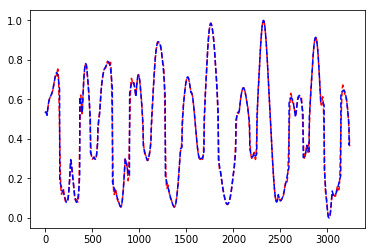

{'alpha': 0.001,
 'coef0': 1,
 'degree': 3,
 'gamma': 10,
 'kernel': 'rbf',
 'kernel_params': None}

In [32]:
reg = KernelRidge(kernel="rbf", alpha=0.001, gamma=10)
reg.fit(X,Y)
pred_val = reg.predict(X)
plt.plot(range(len(pred_val)), pred_val, 'r--', range(len(pred_val)), Y, 'b--')
plt.show()
reg.get_params()

Step #75
Loss = -112.92762
Acc = 0.0
Step #150
Loss = -225.38657
Acc = 0.0
Step #225
Loss = -337.89438
Acc = 0.0
Step #300
Loss = -450.24124
Acc = 0.0
Step #375
Loss = -562.7439
Acc = 0.0
Step #450
Loss = -675.2739
Acc = 0.0
Step #525
Loss = -787.6502
Acc = 0.0
Step #600
Loss = -900.18744
Acc = 0.0
Step #675
Loss = -1012.69055
Acc = 0.0
Step #750
Loss = -1124.9464
Acc = 0.0
Step #825
Loss = -1237.2437
Acc = 0.0
Step #900
Loss = -1349.9122
Acc = 0.0
Step #975
Loss = -1462.0918
Acc = 0.0
Step #1050
Loss = -1573.4875
Acc = 0.0
Step #1125
Loss = -1687.0739
Acc = 0.0
Step #1200
Loss = -1798.3354
Acc = 0.0
Step #1275
Loss = -1911.4098
Acc = 0.0
Step #1350
Loss = -2024.4268
Acc = 0.0
Step #1425
Loss = -2136.134
Acc = 0.0
Step #1500
Loss = -2249.2334
Acc = 0.0
Step #1575
Loss = -2361.3806
Acc = 0.0
Step #1650
Loss = -2473.946
Acc = 0.0
Step #1725
Loss = -2585.7131
Acc = 0.0
Step #1800
Loss = -2697.4048
Acc = 0.0
Step #1875
Loss = -2810.5474
Acc = 0.0
Step #1950
Loss = -2921.17
Acc = 0.0
Step #

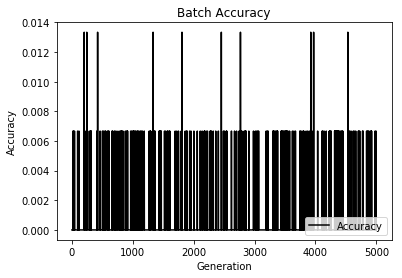

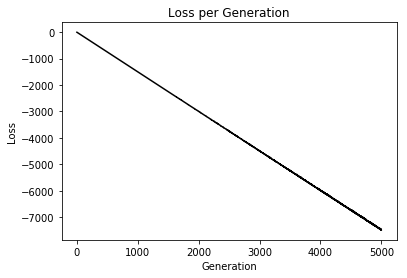

In [56]:
import tensorflow as tf

sess = tf.Session()

x_vals = np.array(X)
y_vals = np.array(Y)

# Declare batch size
batch_size = 150

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 5], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
prediction_grid = tf.placeholder(shape=[None, 5], dtype=tf.float32)

# Create variables for svm
b = tf.Variable(tf.random_normal(shape=[1, batch_size]))

# Gaussian (RBF) kernel
gamma = tf.constant(-25.0)
sq_dists = tf.multiply(2., tf.matmul(x_data, tf.transpose(x_data)))
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_dists)))

# Compute SVM Model
first_term = tf.reduce_sum(b)
b_vec_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
second_term = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vec_cross, y_target_cross)))
loss = tf.negative(tf.subtract(first_term, second_term))

# Gaussian (RBF) prediction kernel
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1), [-1, 1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid), 1), [-1, 1])
pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2., tf.matmul(x_data, tf.transpose(prediction_grid)))), tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))

prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target), b), pred_kernel)
prediction = tf.sign(prediction_output - tf.reduce_mean(prediction_output))
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(y_target)), tf.float32))

# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Training loop
loss_vec = []
batch_accuracy = []
for i in range(5000):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = np.transpose([y_vals[rand_index]])[0]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    acc_temp = sess.run(accuracy, feed_dict={x_data: rand_x,
                                             y_target: rand_y,
                                             prediction_grid: rand_x})
    batch_accuracy.append(acc_temp)
    
    if (i + 1) % 75 == 0:
        print('Step #' + str(i + 1))
        print('Loss = ' + str(temp_loss))
        print('Acc = ' + str(acc_temp))

# Plot batch accuracy
plt.plot(batch_accuracy, 'k-', label='Accuracy')
plt.title('Batch Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()